# Objectives

# Questions we want to answer in this module:

In [3]:
# Do I know if the dealer is offering fair value for my trade-in?
# Do I know if I put a fair value on my car?

# Set up the libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data and store it in the dataframe "df"

In [5]:
path = 'C:\\Users\\melan\\anaconda3\\PyCharmProject\EdxCourse\\Module3_automobileEDA.csv'

df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [6]:
df['engine-size']

0      130
1      130
2      152
3      109
4      136
      ... 
196    141
197    141
198    173
199    145
200    141
Name: engine-size, Length: 201, dtype: int64

# 1. Linear Regression and Multiple Linear Regression

# Load module from sklearn.linear_model for Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
# Create the linear regression object:

lm = LinearRegression()
lm

LinearRegression()

# How could "highway-mpg" help us predict car price? => define X and Y variables

In [12]:
# For this example, we want to look at how highway-mpg can help us predict car price. 
# Using simple linear regression, we will create a linear function 
# with "highway-mpg" as the predictor variable and the "price" as the response variable.

X = df[['highway-mpg']] # use 2 [] for X otherwise we have issues
Y = df['price']

# Fit the linear model => lm.fit()

In [13]:
lm.fit(X,Y)

LinearRegression()

In [14]:
# We can output a prediction:
Yhat = lm.predict(X)
Yhat[0:5]

# # By using Yhat[0:5] I am slicing the Yhat values and the result of this slice is first 5 values only

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

# What is the value of the intercept (a)?

In [15]:
lm.intercept_

38423.305858157386

# What is the value of the slope (b)?

In [16]:
lm.coef_

array([-821.73337832])

# What is the final estimated linear model we get?

In [17]:
# As we saw above, we should get a final linear model with the structure:
        # Yhat = a + bX (where 'a' is the intercept and 'b' is the slope)

# Plugging in the actual values we get:
Yhat = 38423.31 - 821.73*X
Yhat

,highway-mpg
0,16236.60
1,16236.60
2,17058.33
3,13771.41
4,20345.25
...,...
196,15414.87
197,17880.06
198,19523.52
199,16236.60


# Second method using np.polyfit(x, y, 1) 

In [18]:
# 1 is the degree of the fitting polynomial. 
# Ex: in a Simple LinearRegression, degree is 1

x = df['highway-mpg'] # In this case only 1 [] for this paramter as we are in 1D polynomial
y = df['price']
lm = np.polyfit(x, y, 1)
lm


# array results is [a, b] because it follows the function y = a*x + b
# where a is the coef and b the intercept 

array([ -821.73337832, 38423.30585816])

In [19]:
Yhat2 = -821.73*x + 38423.31
Yhat2

# Plugging in the actual values we get:

# Price = a + b*highway-mpg
# Price = 38423.31 - 821.73*highway-mpg

0      16236.60
1      16236.60
2      17058.33
3      13771.41
4      20345.25
         ...   
196    15414.87
197    17880.06
198    19523.52
199    16236.60
200    17880.06
Name: highway-mpg, Length: 201, dtype: float64

# Exercise:

In [20]:
# create a LinearRegression object called "lm1" and train the model using "engine-size" as the independent variable and "price" as the dependent variable

from sklearn.linear_model import LinearRegression
lm1 = LinearRegression()
lm1

LinearRegression()

In [21]:
X = df[['engine-size']]
Y = df['price']

lm1.fit(X,Y)

Yhat = lm1.predict(X)

In [22]:
a = lm1.intercept_
b = lm1.coef_

print("Intercept is", a, "and coef is", b)

Intercept is -7963.338906281046 and coef is [166.86001569]


In [23]:
Yhat = -7963.34 + 166.86*X
Yhat

,engine-size
0,13728.46
1,13728.46
2,17399.38
3,10224.40
4,14729.62
...,...
196,15563.92
197,15563.92
198,20903.44
199,16231.36


In [24]:
# Attempt with the other method

x = df['engine-size']
y = df['price']

lm1_bis = np.polyfit(x, y, 1) # x and y always in small letters!!
lm1_bis

array([  166.86001569, -7963.33890628])

In [25]:
Yhat = 166.86*x -7963.34
Yhat.head().to_frame()

,engine-size
0,13728.46
1,13728.46
2,17399.38
3,10224.40
4,14729.62


# Multiple Linear Regression

# Let's develop a model using these variables as the predictor variables

In [31]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

# Fit the linear model using the four above-mentioned variables

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lm = LinearRegression()

lm.fit(Z, df['price'])

LinearRegression()

In [34]:
a = lm.intercept_
b = lm.coef_
print("The intercept a is", a, "the coef b1, b2, b3, b4 are respectively", b) # in this case we have 4 variables

The intercept a is -15806.624626329223 the coef b1, b2, b3, b4 are respectively [53.49574423  4.70770099 81.53026382 36.05748882]


In [35]:
Yhat = lm.predict(Z)
Yhat = -15806.62 + 53.50*df['horsepower'] + 4.71*df['curb-weight'] + 81.53*df['engine-size'] + 36.06*df['highway-mpg']
Yhat.to_frame()

# Price = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight + 81.95906216 x engine-size + 33.58258185 x highway-mpg

,0
0,13705.48
1,13705.48
2,19058.83
3,10626.22
4,15528.32
...,...
196,16701.71
197,19511.40
198,20482.97
199,17811.92


# Exercise

In [36]:
# Create and train a Multiple Linear Regression model "lm2" where the response variable is "price", and the predictor variable is "normalized-losses" and "highway-mpg"

Z = df[['normalized-losses', 'highway-mpg']]
Y = df['price']

lm2 = LinearRegression()
lm2 = lm2.fit(Z,Y) # Be careful => lm.fit() !!!! No lm.fit = XXXX
Yhat = lm2.predict(Z)

In [37]:
a = lm2.intercept_
b = lm2.coef_
print("the intercept is", a, "the coef b1 and b2 are respectively", b)

the intercept is 38201.313272457286 the coef b1 and b2 are respectively [   1.49789586 -820.45434016]


In [38]:
Yhat = 38201.31 + 1.50*df['normalized-losses'] -820.45*df['highway-mpg']
Yhat

0      16232.16
1      16232.16
2      17052.61
3      13833.81
4      20397.41
         ...   
196    15371.21
197    17832.56
198    19473.46
199    16191.66
200    17832.56
Length: 201, dtype: float64

# 2. Model Evaluation Using Visualization

In [39]:
# Now that we've developed some models, how do we evaluate our models and choose the best one? 
# One way to do this is by using a visualization.

In [40]:
import seaborn as sns
%matplotlib inline

# Regression Plot

# Let's visualize highway-mpg as potential predictor variable of price using plt.figure and sns.regplot

(0.0, 48168.26569459221)

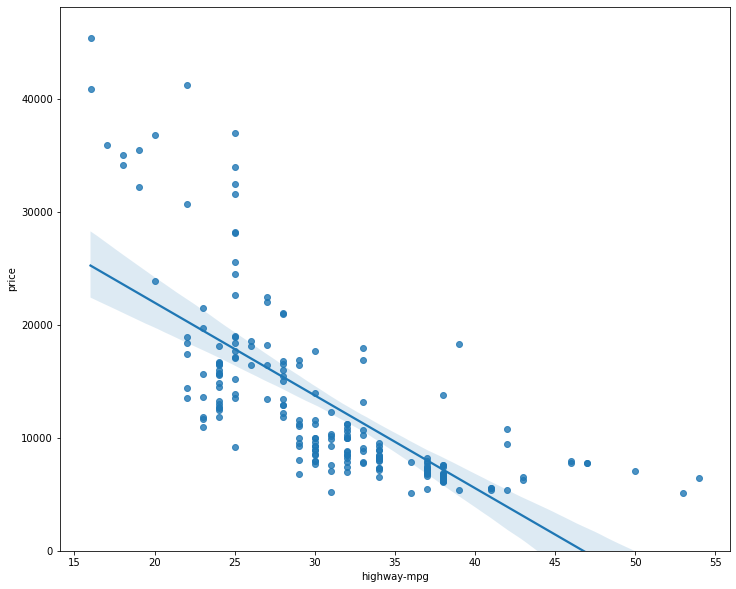

In [42]:
width = 12
lenght = 10
plt.figure(figsize =(width, lenght))
sns.regplot(x = 'highway-mpg', y= 'price', data= df)
plt.ylim(0,)

In [43]:
# sns.regplot(x = "highway-mpg", y = "price", data = df)
    # x = name of the column that contains the INDEPENDENT VARIABLE or FEATURE
    # y = name of the column that contains the name of DEPENDENT VARIABLE or TARGET
    
# We can see from this plot that price is NEGATIVELY correlated to highway-mpg since the regression slope is negative.

# TO KEEP IN MIND

In [45]:
# Use the R-squared (R²) to see the accuracy of the model
from sklearn.metrics import r2_score
r2_score(y, x) # always r2_score (y_value, x_value)

-2.7135118158266742

# Peak-rpm example

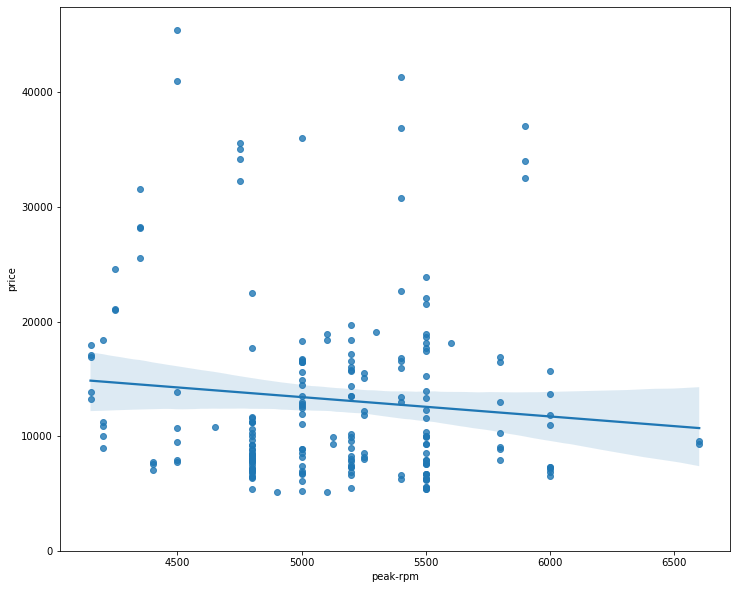

In [46]:
# Let's compare this plot to the regression plot of "peak-rpm":
width = 12
lenght = 10
plt.figure(figsize = (width,lenght))
sns.regplot(x= 'peak-rpm', y= 'price', data=df)
plt.ylim(0,)
plt.show()

In [47]:
# Comparing the regression plot of "peak-rpm" and "highway-mpg",
# we see that the points for "highway-mpg" are much closer to the generated line and, on average, decrease. 

# The points for "peak-rpm" have more spread around the predicted line
# and it is much harder to determine if the points are decreasing or increasing as the "price" increases.

In [48]:
# Question: Which one between "peak-rpm" or "highway-mpg" is more strongly correlated with "price"?

df[['peak-rpm', 'highway-mpg', 'price']].corr()

# Obviously highway-mpg is more correlated (negatively) to price than peak-rpm (respectively ~-0.70 against ~ -0.10)

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


# Residual plot => useful to visualize the diff between the actual value and the predicted value using the function sns.residplot()

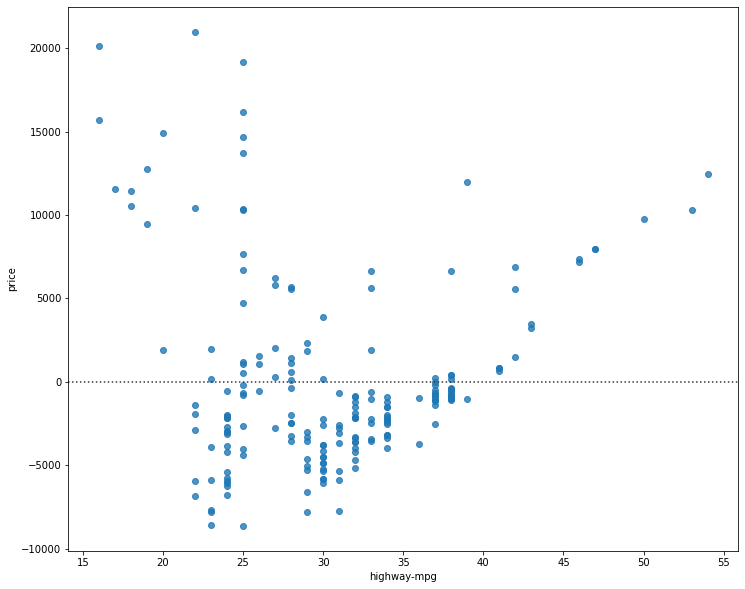

In [50]:
width = 12
lenght = 10
plt.figure(figsize= (width, lenght))
sns.residplot(x='highway-mpg', y= 'price', data= df)
plt.show()

In [51]:
# What is this plot telling us?

# We can see from this residual plot that the residuals are not randomly spread around the x-axis, 
# leading us to believe that maybe a non-linear model is more appropriate for this data.

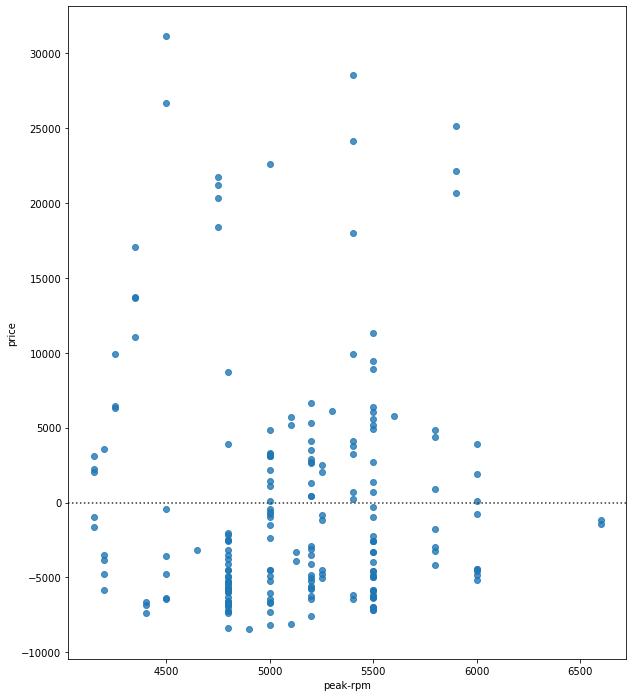

In [52]:
# Create a Residual plot for Peak-rpm value

width = 10
lenght = 12
plt.figure(figsize= (width, lenght))
sns.residplot(x= 'peak-rpm', y= 'price', data= df)
plt.show()

# same conclusion for the peak-rpm, a linear model does not seems to be the appropriate model

# Multiple Linear Regression => need to look at the distribution plot sns.distplt

# let's make a prediction:

In [54]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Y = df['price']
lm = lm.fit(Z,Y)
Y_hat = lm.predict(Z)

C:\Users\melan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\melan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


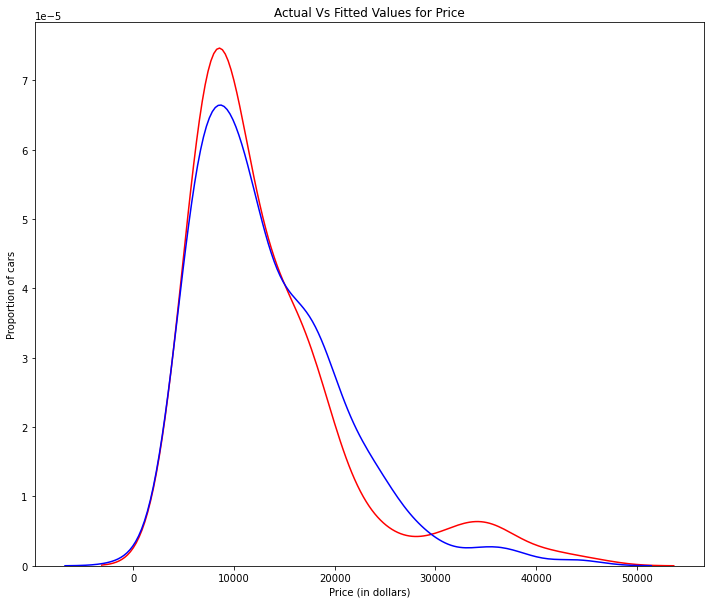

In [55]:
width = 12
lenght = 10
plt.figure(figsize= (width, lenght))

# define "ax1" which is the curve of the current values for price
ax1= sns.distplot(df['price'], hist= False, color= "r", label= "Actual Value")

# define the " predicted values" using the sns.distplot function:
sns.distplot(Y_hat, hist = False, color= "b", label= "Fitted Value", ax= ax1)

plt.title('Actual Vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of cars')

plt.legend()
plt.show()
plt.close()

In [56]:
# We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. 
# However, there is definitely some room for improvement.

# 3. Polynomial Regression and Pipelines

# Polynomial model using PlotPolly(model, independent_variable, dependent_variable, Name)

In [59]:
def PlotPolly(model, independent_variable, dependent_variable, Name): # refers to the variable PlotPolly(p, x, y, 'highway-mpg')
    x_new = np.linspace(15, 55, 100) # np.linspace(start, stop, num) # np.linspace(df[feature].min(), df[feature].max(), 100)
    y_new = model(x_new)
    
    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-') # Here dot represents original values and the line represents new values.
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca() # gca = get current axes. "Current" here means that it provides a handle to the last active axes.
    ax.set_facecolor(((0.898, 0.898, 0.898)))
    fig= plt.gcf() # means get current figure
    plt.xlabel(Name)
    plt.ylabel('Price of cars')
    
    plt.show()
    plt.close()

In [60]:
# Get the variables:

x= df['highway-mpg']
y= df['price']

# Fit the polynomial using the function np.polyfit() and np.poly1d()

In [61]:
# then use the function poly1d to display the polynomial function.
# Here we use a polynomial of the 3rd order (cubic) ==> how do we know this is a 3rd order cubic, and not higher or lower degree? => because I do set it up

f= np.polyfit(x, y, 3)
p= np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


# Plot the function PlotPolly( [np.poly1d()] , x, y, "x name column")

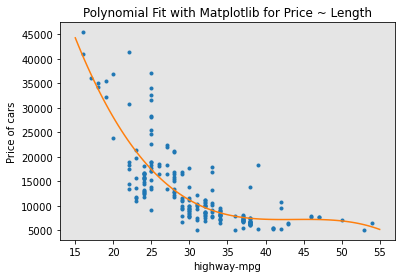

In [62]:
PlotPolly(p, x, y, 'highway-mpg')

In [64]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [65]:
# We can already see from plotting that this polynomial model performs better than the linear model. 
# This is because the generated polynomial function "hits" more of the data points.

# Exercise

In [72]:
# Create 11 order polynomial model with the variables x and y from above

x = df['highway-mpg']
y = df['price']

figure = np.polyfit(x, y, 11)
predict = np.poly1d(figure)
print(predict)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


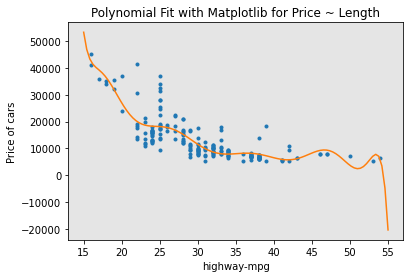

In [73]:
PlotPolly(predict, x, y, 'highway-mpg')

In [76]:
# Let's say the highway mpg is 30, we can predict the price:
highway_mpg = 30
predict(highway_mpg)

11539.50487345457

# POLYNOMIAL REGRESSION WITH MORE THAN ONE DIMENSION

In [79]:
# np.polyfit() cannot perform this kind of expression 
# We can perform a polynomial transform on multiple features

# Step1: Import module PolynomialFeatures:

In [80]:
from sklearn.preprocessing import PolynomialFeatures

# Step2: create a PolynomialFeatures object of degree 2:

In [82]:
pr = PolynomialFeatures(degree= 2)
pr

PolynomialFeatures()

# Step3: Define de variable:

In [83]:
Z_pr = pr.fit_transform(Z)

In [84]:
# In the original data, there are 201 samples and 4 features
Z.shape

(201, 4)

In [85]:
# After the transformation, there are 201 samples and 15 features
Z_pr.shape

(201, 15)

# Pipeline with StandardScaler

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [89]:
# We create the pipeline by creating a list of tuples 
# including the name of the model or estimator and its corresponding constructor.

Input= [('Scale', StandardScaler()), ('Polynomial', PolynomialFeatures(include_bias= False)), ('model', LinearRegression())]

# We input the list (Input) as an argument to pipe= Pipeline()

In [90]:
pipe= Pipeline(Input)
pipe

Pipeline(steps=[('Scale', StandardScaler()),
                ('Polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

# Transform the data type Z to float .astype(float) to avoid conversion error

In [95]:
Z = Z.astype('float')
Z.head()

,horsepower,curb-weight,engine-size,highway-mpg
0,111.0,2548.0,130.0,27.0
1,111.0,2548.0,130.0,27.0
2,154.0,2823.0,152.0,26.0
3,102.0,2337.0,109.0,30.0
4,115.0,2824.0,136.0,22.0


# Normalize the data, perform a transform and fit the model simultaneously.

In [96]:
pipe.fit(Z, y)

Pipeline(steps=[('Scale', StandardScaler()),
                ('Polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

# Produce a prediction

In [99]:
Y_pipe = pipe.predict(Z)
Y_pipe[0:5]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164])

# Exercise:

In [104]:
# Create a pipeline that standardizes the data, then produce a prediction using a linear regression model 
# using the features Z and target y:

Input_2 = [('Scale', StandardScaler()), ('model', LinearRegression())]
pipe = Pipeline(Input_2)
pipe

Pipeline(steps=[('Scale', StandardScaler()), ('model', LinearRegression())])

In [107]:
pipe.fit(Z, y)

Y_pipe2 = pipe.predict(Z)
Y_pipe2[0:5]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211])

# 4. Measures for In-Sample Evaluation

# Model 1: Simple Linear Regression with R²

In [112]:
# define the variables:

from sklearn.linear_model import LinearRegression
lm = LinearRegression()

#highway_mpg_fit
x_model_evaluation = df[['highway-mpg']] # refers at the first line codes for linear regression
y_model_evaluation = df['price']

lm.fit(x_model_evaluation, y_model_evaluation)

print("The R-square is", lm.score(x_model_evaluation, y_model_evaluation))

The R-square is 0.4965911884339175


In [113]:
# we can say that ~49.659% of the variation of the price is explained by this simple linear model "highway-mpg_fit"

# Calculate MSE

In [114]:
# We can predict the output i.e., "yhat" using the predict method, where x_model_evaluation is the input variable:

Yhat = lm.predict(x_model_evaluation)
print('The output of the first 4 predicted value is:', Yhat[0:4])

The output of the first 4 predicted value is: [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


# Let's import the function mean_squared_error from the module metrics:

In [115]:
from sklearn.metrics import mean_squared_error

In [117]:
# We can compare the predicted results with the actual results:

mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is:', mse)

The mean square error of price and predicted value is: 31635042.944639895


# Model 2: Multiple Linear Regression with R²

In [119]:
# fit the model
lm.fit(Z, df['price'])

# Find the R^2
print('The R-square is', lm.score(Z, df['price']))

The R-square is 0.8093562806577457


In [121]:
# We can say that ~80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".
# so the Multiple linear Regression model is more accurate that the Simple Linear Regression one

# Calculate the MSE

In [123]:
# produca prediction:
Y_predict_multifit = lm.predict(Z)

In [124]:
# We compare the predicted results with the actual results:
print('The mean square error of price and predicted value using multifit is:', mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is: 11980366.87072649


# Model 3: Polynomial Fit

In [125]:
# Calculate R²
# Let’s import the function r2_score from the module metrics as we are using a different function:

from sklearn.metrics import r2_score

In [129]:
# We apply the function to get the value of R^2:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.7023769092452208


In [130]:
# We can say that ~70.23 % of the variation of price is explained by this polynomial fit.

In [131]:
# calculate MSE
mean_squared_error(df['price'], p(x))

18703127.639051963

# 5. Prediction and Decision Making

In [134]:
# In the previous section, we trained the model using the method fit. 
# Now we will use the method predict to produce a prediction. 
# Lets import pyplot for plotting; we will also be using some functions from numpy.

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [135]:
# Create a new input:

new_input = np.arange(1, 100, 1).reshape(-1, 1)

In [136]:
# Fit the model:
lm.fit(X, Y)
lm

LinearRegression()

In [138]:
# Produce a prediction:
Yhat = lm.predict(new_input)
Yhat[0:5]

array([-7796.47889059, -7629.6188749 , -7462.75885921, -7295.89884352,
       -7129.03882782])

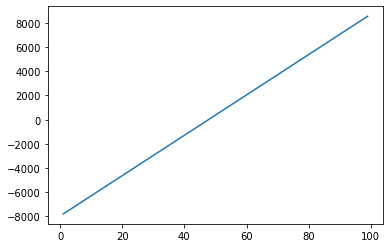

In [139]:
# We can plot the data:
plt.plot(new_input, Yhat)
plt.show()

# Decision Making: Determining a Good Model Fit

In [141]:
# Let's take a look at the values for the different models:
# Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price:
        # R² = 0.4965
        # MSE = 3.16 x10^7
        
# Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
        # R² = 0.8093
        # MSE = 1.2x10^7

# Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
        # R² = 0.7023
        # MSE = 1.9 x10^7

# Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR) vs Polynomial Fit

In [142]:
# Usually, the more variables you have, the better your model is at predicting, but this is not always true. 
# Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and even act as noise. 
# As a result, you should always check the MSE and R^2.

# In order to compare the results of the MLR vs SLR models,
# we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.

# We will do the same for SLR and Polynomial fit => compare both R² and MSE
# We will do the same for MLR and Polynomial fit =W compare both R² and MSE

# Conclusion

In [143]:
# Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset. 
# This result makes sense since we have 27 variables in total 
# and we know that more than one of those variables are potential predictors of the final car price.